In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option("display.max_rows",1000)
warnings.filterwarnings("ignore")
%matplotlib inline

In [35]:
url="https://www.hepsiemlak.com/denizli-kiralik"
response=requests.get(url)

In [36]:
response

<Response [200]>

In [37]:
soup=BeautifulSoup(response.text,"html.parser")

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D" data-n-head-ssr="" lang="tr-TR">
<head>
<title>Denizli Kiralık Konut &amp; Ev Fiyatları | hepsiemlak</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="tr" data-n-head="ssr" http-equiv="content-language"/><meta content="no-referrer-when-downgrade" data-n-head="ssr" name="referrer"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="Hepsiemlak" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="hemlak-storefront" data-hid="author" data-n-head="ssr" name="author"/><meta content="white" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="Denizli Kiralık Konut ilanları ve ev fiyatları hepsiemlak'ta! Sahibinden veya emlakçıdan; 1+1, 2+1, 3+1 konut ve merkezi evler için 
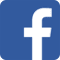
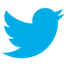
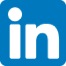
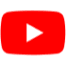

In [38]:
soup

In [39]:
pages=soup.findAll("li",{"class":"he-pagination__item"})
last_page=0
for i in pages:
    last_page=i.text
last_page=int(last_page)

In [40]:
last_page

14

In [42]:
prices=[]
room_counts=[]
meter_squares=[]
build_ages=[]
floor_types=[]
towns=[]
neighbourhoods=[]
listing_dates=[]
estate_agents=[]
advert_noes=[]

for i in range(1,last_page+1):
    
    url="https://www.hepsiemlak.com/denizli-kiralik?page="+str(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html.parser")     
    priceOnce=soup.findAll("div",{"class":"top"})   
    price=soup.findAll("span",{"class":"list-view-price"})     
    room_count=soup.findAll("span",{"class":"celly houseRoomCount"})     
    meter_square=soup.findAll("span",{"class":"celly squareMeter list-view-size"})   
    build_age=soup.findAll("span",{"class":"celly buildingAge"})    
    floor_type=soup.findAll("span",{"class":"celly floortype"})
    location=soup.findAll("div",{"class":"list-view-location"})
    listing_date=soup.findAll("span",{"class":"list-view-date"})
    estate_agent=soup.findAll("span",{"class":"phone-consultant-name"})
    advert_no=soup.findAll("span",{"class":"phone-listing-id"})
    
    #  G DEN SONRA Kİ DETAYLAR GELMİYOR ONLARA BAKILACAK
    
     
    for a,b,c,d,e,f,g,h,j,k in zip(price,room_count,meter_square,build_age,floor_type,location,location,listing_date,estate_agent,advert_no):
                                 
        prices.append(a.text.replace("\n","").replace(" ","").replace("TL",""))  
       
        room_counts.append(b.text)        
        meter_squares.append(c.text.replace("\n","").replace(" ","").replace("m2",""))
        build_ages.append(d.text)
        floor_types.append(e.text.replace("\n","").replace(" ",""))
        towns.append(f.text.replace("\n","").replace(" ","").split(",")[0])
        neighbourhoods.append(f.text.replace("\n","").replace(" ","").split(",")[1])
        listing_dates.append(h.text)
        estate_agents.append(j.text.replace("\n","").replace(" ",""))
        advert_noes.append(k.text.replace("\n","").replace(" ","").replace("İlanNo:",""))

In [43]:
datas={"İlan NO":advert_noes,"Fiyat":prices,"Oda Sayısı":room_counts,"Metre Kare":meter_squares,"Bina Yaşı":build_ages,"Kat No":floor_types,"İlçe":towns,"Mahalle":neighbourhoods,"İlan Tarihi":listing_dates,"Emlakçı":estate_agents}

In [44]:
df=pd.DataFrame(datas)
df

,İlan NO,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı,Kat No,İlçe,Mahalle,İlan Tarihi,Emlakçı
0,128169-163,5.000,4 + 1,200,15 Yaşında,5.Kat,Merkezefendi,SelçukBeyMahallesi,\n 02 Aralık 2022\n,AkifErsoy
1,94398-4959,3.000,2 + 1,125,21 Yaşında,3.Kat,Merkezefendi,YenişehirMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
2,123902-432,4.000,2 + 1,120,Sıfır Bina,YüksekGiriş,Merkezefendi,1200EvlerMahallesi,\n 02 Aralık 2022\n,ÖZENÖZÇELİK
3,128169-165,3.750,3 + 1,175,16 Yaşında,3.Kat,Merkezefendi,YenişafakMahallesi,\n 02 Aralık 2022\n,AkifErsoy
4,130837-266,3.600,3 + 1,150,Sıfır Bina,BahçeKatı,Merkezefendi,MehmetAkifErsoyMahallesi,\n 02 Aralık 2022\n,SinanÇetin
5,66036-55,5.250,2 + 1,100,26 Yaşında,4.Kat,Pamukkale,KınıklıMahallesi,\n 02 Aralık 2022\n,MustafaKocabay
6,60626-891,1.750,2 + 1,120,32 Yaşında,2.Kat,Merkezefendi,MuratdedeMahallesi,\n 02 Aralık 2022\n,HALİLKOÇOĞLU
7,94398-4939,2.800,2 + 1,95,21 Yaşında,YüksekGiriş,Merkezefendi,AdaletMahallesi,\n 02 Aralık 2022\n,mervekoyunyerli
8,131323-68,3.000,2 + 1,80,Sıfır Bina,2.Kat,Merkezefendi,MehmetAkifErsoyMahallesi,\n 29 Kasım 2022\n,FatmaUlaman
9,128687-252,9.950,4 + 1,205,Sıfır Bina,2.Kat,Merkezefendi,ŞemiklerMahallesi,\n 30 Kasım 2022\n,MustafaESKİ


In [50]:
df.to_csv("denizli_hurriyet_emlak.csv")

In [51]:
df2=pd.read_csv("denizli_hurriyet_emlak.csv")

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   335 non-null    int64  
 1   İlan NO      335 non-null    object 
 2   Fiyat        335 non-null    float64
 3   Oda Sayısı   335 non-null    object 
 4   Metre Kare   335 non-null    int64  
 5   Bina Yaşı    335 non-null    object 
 6   Kat No       330 non-null    object 
 7   İlçe         335 non-null    object 
 8   Mahalle      335 non-null    object 
 9   İlan Tarihi  335 non-null    object 
 10  Emlakçı      335 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 28.9+ KB


In [5]:
df2.isnull().sum()

Unnamed: 0     0
Fiyat          0
Oda Sayısı     0
Metre Kare     0
Bina Yaşı      0
Kat No         5
İlçe           0
Mahalle        0
İlan Tarihi    0
Emlakçı        0
dtype: int64

In [6]:
df2.head()

,Unnamed: 0,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı,Kat No,İlçe,Mahalle,İlan Tarihi,Emlakçı
0,0,5000,5,200,15,5.0,Merkezefendi,SelçukBeyMahallesi,\n Akif Ersoy\n,İlanNo:128169-163
1,1,3000,3,125,21,3.0,Merkezefendi,YenişehirMahallesi,\n merve koyunyerli\n,İlanNo:94398-4959
2,2,4000,3,120,0,0.0,Merkezefendi,1200EvlerMahallesi,\n ÖZEN ÖZÇELİK\n,İlanNo:123902-432
3,3,3750,4,175,16,3.0,Merkezefendi,YenişafakMahallesi,\n Akif Ersoy\n,İlanNo:128169-165
4,4,3600,4,150,0,0.0,Merkezefendi,MehmetAkifErsoyMahallesi,\n Sinan Çetin\n,İlanNo:130837-266


In [7]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df2

,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı,Kat No,İlçe,Mahalle,İlan Tarihi,Emlakçı
0,5000,5,200,15,5.0,Merkezefendi,SelçukBeyMahallesi,\n Akif Ersoy\n,İlanNo:128169-163
1,3000,3,125,21,3.0,Merkezefendi,YenişehirMahallesi,\n merve koyunyerli\n,İlanNo:94398-4959
2,4000,3,120,0,0.0,Merkezefendi,1200EvlerMahallesi,\n ÖZEN ÖZÇELİK\n,İlanNo:123902-432
3,3750,4,175,16,3.0,Merkezefendi,YenişafakMahallesi,\n Akif Ersoy\n,İlanNo:128169-165
4,3600,4,150,0,0.0,Merkezefendi,MehmetAkifErsoyMahallesi,\n Sinan Çetin\n,İlanNo:130837-266
5,5250,3,100,26,4.0,Pamukkale,KınıklıMahallesi,\n Mustafa Kocabay\n,İlanNo:66036-55
6,1750,3,120,32,2.0,Merkezefendi,MuratdedeMahallesi,\n HALİL KOÇOĞLU\n,İlanNo:60626-891
7,2800,3,95,21,0.0,Merkezefendi,AdaletMahallesi,\n merve koyunyerli\n,İlanNo:94398-4939
8,3000,3,80,0,2.0,Merkezefendi,MehmetAkifErsoyMahallesi,\n Fatma Ulaman\n,İlanNo:131323-68
9,9950,5,205,0,2.0,Merkezefendi,ŞemiklerMahallesi,\n Mustafa ESKİ\n,İlanNo:128687-252


In [9]:
df2["Fiyat"]=df2["Fiyat"].astype(int)

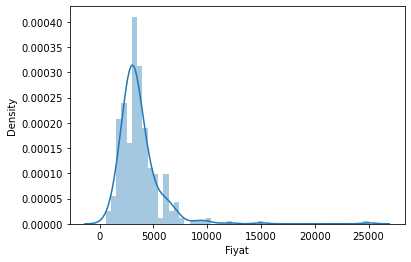

In [10]:
df2=df2[df2["Fiyat"]<3000000]
sns.distplot(df2.Fiyat);

In [11]:
df2["Oda Sayısı"]=df2["Oda Sayısı"].astype("string")

In [12]:
df2["Oda Sayısı"]=df2["Oda Sayısı"].str.replace("\n","").replace("Stüdyo","").replace("","0").str.split("+").str[0].astype("int")+1
df2=df2[df2["Oda Sayısı"]<10]

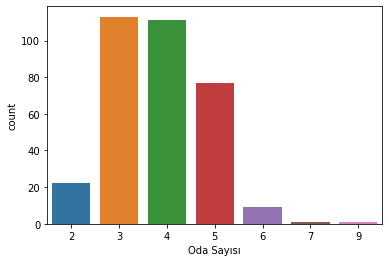

In [13]:
sns.countplot(df2["Oda Sayısı"]);

In [14]:
df2["Metre Kare"]=df2["Metre Kare"].astype("string")

In [15]:
df2["Metre Kare"]=df2["Metre Kare"].str.split("-").str[0].str.replace(".","").astype("int")

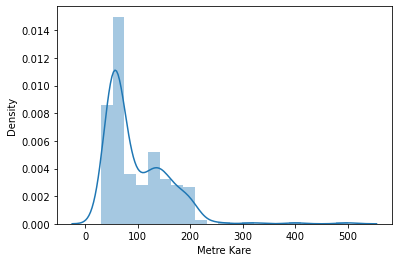

In [16]:
df2=df2[df2["Metre Kare"]<600]
sns.distplot(df2["Metre Kare"]);

In [17]:
df2["Bina Yaşı"]=df2["Bina Yaşı"].astype("string")

In [18]:
df2["Bina Yaşı"]=df2["Bina Yaşı"].str.replace("Yaşında","").replace("Sıfır Bina","0").replace(" ","").astype("int")

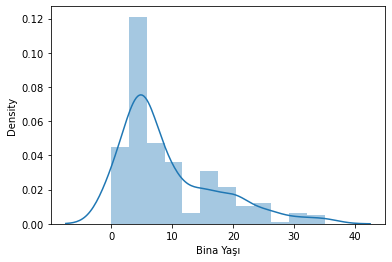

In [19]:
df2=df2[df2["Bina Yaşı"]<60]
sns.distplot(df2["Bina Yaşı"]);

In [20]:
df2["Kat No"]=df2["Kat No"].astype("string")

In [21]:
df2["Kat No"]=df2["Kat No"].replace(["Yüksek0","Giriş","Giriş Katı","Villa","-1veZemin","Bahçe","Bahçe Katı","None","Zemin","Bodrum ve Zemin","Yarı Bodrum","Villa Katı","Yüksek Giriş","YüksekGiriş","Yarı-1"],"0",regex=True)
df2["Kat No"]=df2["Kat No"].str.replace("Katı","")
df2["Kat No"]=df2["Kat No"].str.replace(". Kat","")
df2["Kat No"]=df2["Kat No"].str.replace(".Kat","")
df2["Kat No"]=df2["Kat No"].str.replace("Kot 3","-3")
df2["Kat No"]=df2["Kat No"].str.replace("Kot 2","-2")
df2["Kat No"]=df2["Kat No"].replace(["Kot 1","-1ve0"],"-1")
df2["Kat No"]=df2["Kat No"].str.replace("Kot3","-3")
df2["Kat No"]=df2["Kat No"].str.replace("Kot2","-2")
df2["Kat No"]=df2["Kat No"].str.replace("Kot1","-1")
df2["Kat No"]=df2["Kat No"].str.replace("En Üs","21")
df2["Kat No"]=df2["Kat No"].str.replace("Teras","21")
df2["Kat No"]=df2["Kat No"].str.replace("Çatı","21")
df2["Kat No"]=df2["Kat No"].replace(["21 ve üzeri","21veüzeri","EnÜs"],"21")
df2["Kat No"]=df2["Kat No"].str.replace("Ar","2")
df2["Kat No"]=df2["Kat No"].str.replace("Bodrum","-1")
df2["Kat No"]=df2["Kat No"].str.replace("Yüksek0","")
df2["Kat No"]=df2["Kat No"].fillna("0")

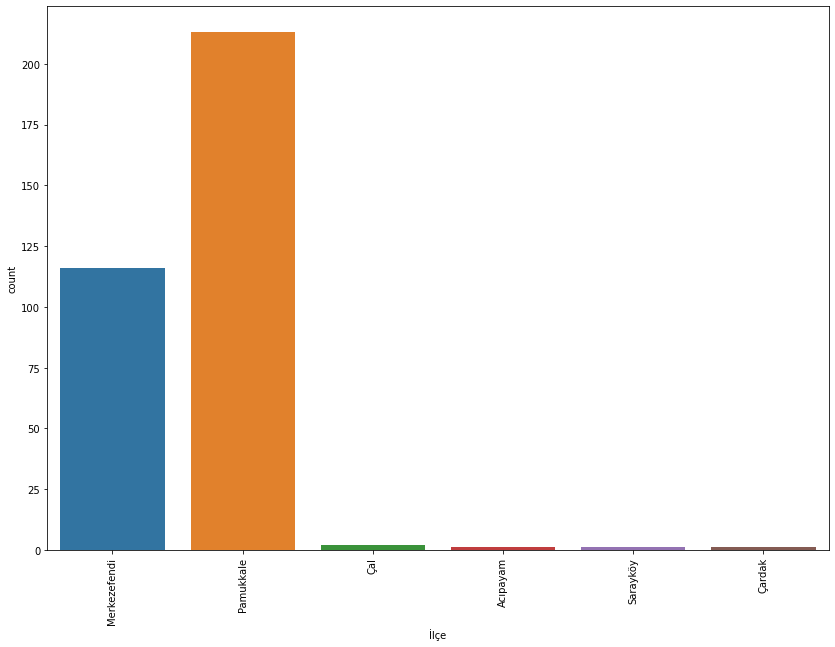

In [24]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sns.countplot(df2["İlçe"]);

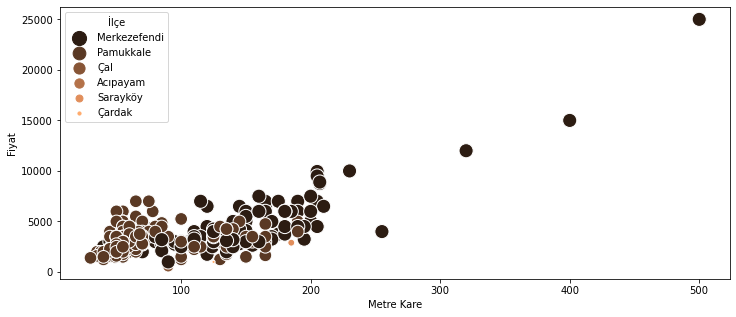

In [25]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="Metre Kare", y="Fiyat",
                     hue="İlçe", size ="İlçe",
                     palette='copper', sizes=(10, 200),
                     data=df2)
plt.xlabel("Metre Kare")
plt.ylabel("Fiyat")
plt.show()

In [53]:
df2["Emlakçı"].value_counts()  

AYGÜLMUTLUBAŞ           45
SerhatÇam               22
NEDİMKISAOĞLU           15
FatihDemirhan           14
SedatYÜRECİ             10
TOLGASAĞIR              10
tarıkkahraman            8
OFİSMUTLUBAŞ             8
İNCİGAYRİMENKUL          7
KOZAGAYRİMENKULB         7
ElifzehraŞişman          7
MustafaUmuç              7
HakanManas               7
celalözcan               6
ErdemÇakır               6
MuhammetAşkar            5
mervekoyunyerli          5
GÖKANDİNCER              5
ALİMANAYCI               5
MuratŞen                 4
ÖZENÖZÇELİK              4
MeltemACAR               3
sevilaykul               3
berrinakça               3
HASANSEFAURKAY           3
ÖZNURDORUM               3
ÖZLERTOKUR               3
FatmaUlaman              3
HALİLKOÇOĞLU             3
ŞahinAyhan               3
ÖzlemHanım               2
hamzaçelik               2
ESRASERİN                2
MahfuzYolcu              2
MUSTAFAÖZTOK             2
SÜLEYMANKAPLAN           2
HÜSEYİNDEDA              2
R

In [29]:
df2.corr()

,Fiyat,Oda Sayısı,Metre Kare,Bina Yaşı
Fiyat,1.000000,0.617024,0.696318,-0.086387
Oda Sayısı,0.617024,1.000000,0.857897,0.313097
Metre Kare,0.696318,0.857897,1.000000,0.330360
Bina Yaşı,-0.086387,0.313097,0.330360,1.000000


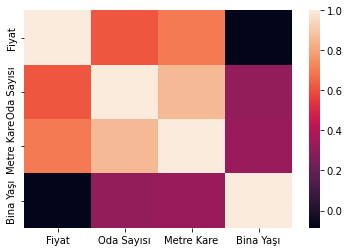

In [30]:
sns.heatmap(df2.corr());

In [31]:
x,y=df2.drop("Fiyat",axis=1),df2[["Fiyat"]]

In [32]:
def regression(x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    #Lineer Olanlar
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Lasso,Ridge
    from sklearn.linear_model import ElasticNet
    
    #Lineer olmayanlar
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    x=pd.get_dummies(x,drop_first=True)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    Li=LinearRegression()
    La=Lasso()
    Ri=Ridge()
    EL=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KNR=KNeighborsRegressor()
    
    model_array=[Li,La,Ri,EL,ETR,GBR,KNR]
    model_names=["LinearRegression","Lasso","Ridge","ElasticNet","ExtraTreeRegressor","GradientBoostingRegressor","KNeighborsRegressor"]
    
    
    mean_squared_array=[]
    r2_score_array=[]
    mean_absolute_array=[]
    
    result=pd.DataFrame(columns=["mean_squared_error","r2_score","mean_absolute_error"],index=model_names)
    
    for i in model_array:
        i.fit(x_train,y_train)
        pred_i=i.predict(x_test)
        mean_squared_array.append((mean_squared_error(y_test,pred_i)**0.5))
        r2_score_array.append(r2_score(y_test,pred_i))
        mean_absolute_array.append(mean_absolute_error(y_test,pred_i))
        
    result.mean_squared_error=mean_squared_array
    result.r2_score=r2_score_array
    result.mean_absolute_error=mean_absolute_array
    
    return result.sort_values("r2_score",ascending=False)

In [33]:
regression(x,y)

,mean_squared_error,r2_score,mean_absolute_error
GradientBoostingRegressor,1840.914149,0.644002,960.815181
Ridge,1893.552714,0.623352,1015.124002
LinearRegression,1893.710118,0.623290,1016.483525
ElasticNet,1912.564496,0.615751,1076.947332
Lasso,2027.418459,0.568215,996.969336
KNeighborsRegressor,2252.462672,0.467039,1073.907463
ExtraTreeRegressor,2427.592026,0.380941,1198.537313
